In [7]:
%matplotlib inline

In [8]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt

In [10]:
air_quality = pd.read_csv("D:/python/.ipynb_checkpoints/yuan/air_quality_no2_long.csv")

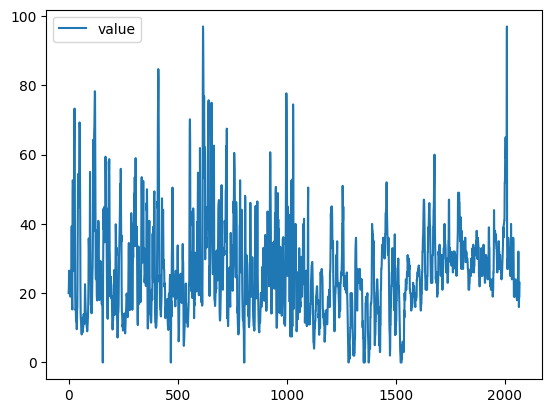

In [11]:
air_quality.plot()
plt.show()

In [12]:
air_quality = air_quality.rename(columns={"date.utc": "datetime"})

In [13]:
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [14]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [15]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])

In [16]:
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

In [17]:
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [18]:
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

In [19]:
air_quality["month"] = air_quality["datetime"].dt.month

In [20]:
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


In [21]:
air_quality.groupby(
    [air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

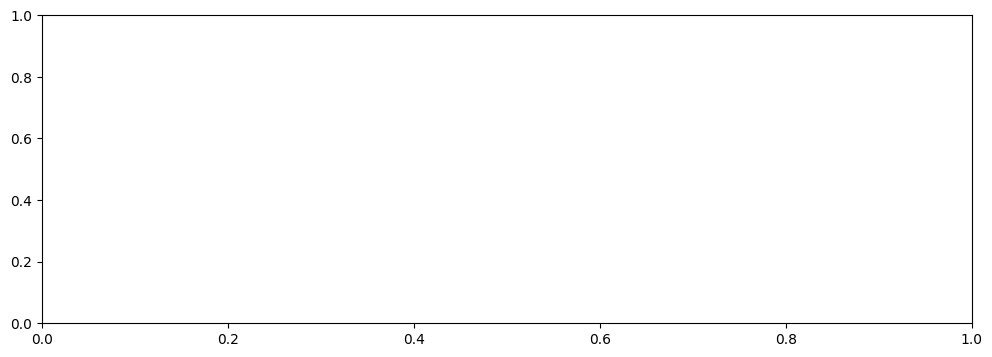

In [22]:
fig, axs = plt.subplots(figsize=(12, 4))

In [23]:
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(
    kind='bar', rot=0, ax=axs
)

<Axes: xlabel='datetime'>

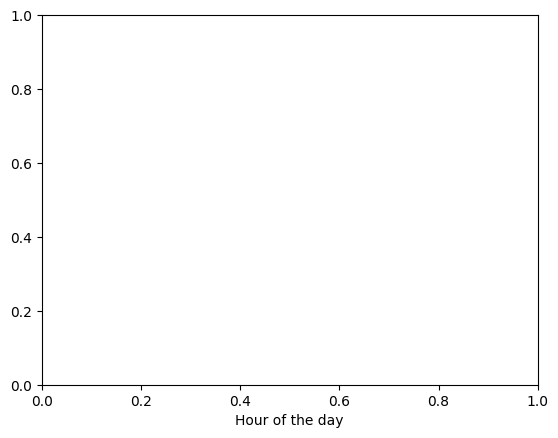

In [24]:
plt.xlabel("Hour of the day");

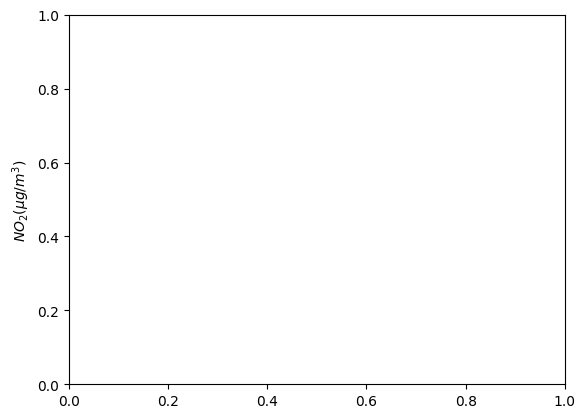

In [25]:
plt.ylabel("$NO_2 (µg/m^3)$");

In [26]:
plt.show()

NameError: name 'hourly_mean' is not defined

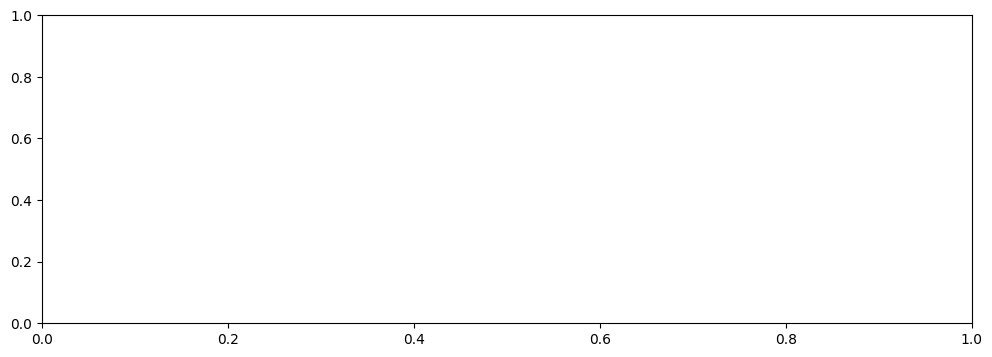

In [27]:
# 4. 绘图（创建画布+绘图+设置标签+渲染，一步完成）
fig, axs = plt.subplots(figsize=(12, 4))  # 创建画布和坐标轴
hourly_mean.plot(kind='bar', rot=0, ax=axs)  # 绘制条形图
axs.set_xlabel("Hour of the day")  # 设置x轴标签
axs.set_ylabel("$NO_2$ ($μg/m^3$)")  # 设置y轴标签（含LaTeX格式）
plt.title("Average NO₂ Concentration by Hour of Day (All Stations)")  # 添加标题（可选）
plt.tight_layout()  # 自动调整布局，避免标签重叠
plt.show()  # 显式渲染图表


In [ ]:
print("提取的小时值（前10条）：", air_quality["datetime"].dt.hour.head(10).tolist())

In [ ]:
print("value列非空数据数量：", air_quality["value"].notna().sum())

In [ ]:
hourly_mean = air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean()
print("按小时分组的均值结果：")
print(hourly_mean)

In [ ]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")

In [ ]:
no_2.head()

In [ ]:
no_2.index.year, no_2.index.weekday

In [ ]:
In [21]: no_2["2019-05-20":"2019-05-21"].plot();


In [ ]:
monthly_max = no_2.resample("ME").max()

In [ ]:
monthly_max

In [ ]:
monthly_max.index.freq
no_2.resample("D").mean().plot(style="-o", figsize=(10, 5));